给定一个函数 f(x) = x^2 + 3*x - 10 , 完成以下题目：

理解方程求根中的二分法(Bisection)，并使用基本的numpy库而非scipy库，来实现算法。  
使用上述算法来得到函数f(x)的根。  
理解梯度下降法(Gradient descent)，并使用基本的numpy库而非scipy库，来实现算法。  
使用上述算法来得到函数f(x)的最小值。  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 函数初探

In [2]:
def f(x):
    return x**2 + 3*x - 10

In [3]:
x=np.linspace(-10,10,100)

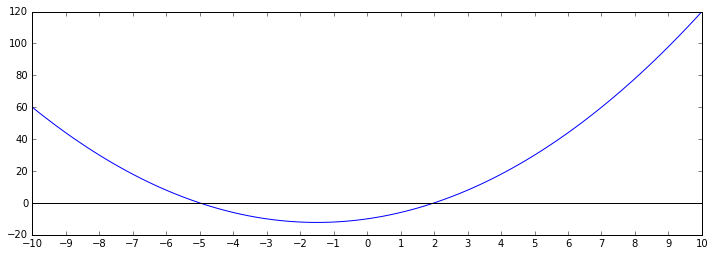

In [23]:
fig,ax = plt.subplots(figsize=(12,4))

ax.plot(x,f(x))
ax.set_xticks(np.linspace(-10,10,21))
ax.axhline(0, color='k');

# Bisection

## 1.什么是二分法

对于区间[a,b]上连续不断且 f(a)\*f(b)<0 的函数y=f(x)，通不过不断地把函数f(x)的零点所在的区间一分为二，使区间的两个端点逐步逼近零点，进而得到零点近似值的方法叫二分法。  
我们可以发现二分法的几个特点：  
（1）f(x)在区间内连续不断;  
（2）零点在区间之间;  
（3）逐步迭代逼近。

## 2.二分法的步骤

2.1 确定区间[a,b]，验证f(a)\*f(b)<0，给定精确度ε;  
2.2 求区间(a,b)的中点c;  
2.3 计算f(c)：
（1）若f(c)=0,则c就是函数的零点；  
（2）若f(a)\*f(c)<0，则令b=c（此时，零点在（a,c）之间）;  
（3）若f(b)\*f(c)<0，则令a=c（此时，零点在（c,b）之间）;  
2.4 判断是否达到精确度ε;若|a-b|<ε，则得到零点近似值a（或b）;  
否则重复2.3的（2）和（3）。

## 3.二分法的实现

### 3.1 标准Python实现

In [82]:
# 标准python

def bisection1(f,a,b):
    eps = 1e-5
    c = (a+b)/2.0
    
    if f(a)*f(b)*f(c) == 0:
        if f(a) == 0:
            x0 = a
        elif f(b) == 0:
            x0 = b
        else:
            x0 =c
    else:
        while f(a)*f(b)<0:
            if f(a)*f(c)<0:
                b = c
            elif f(b)*f(c)<0:
                a = c
            
            elif abs(a-b) < eps:
                x0 = a
    return x0        

In [83]:
bisection1(f,-6,-4)

-5.0

In [84]:
bisection1(f,1,3)

2.0

In [95]:
# 标准python2

def bisection2(a,b,eps):
    c = (a+b)/2.0
    while (b-a)/2.0 >eps:
        if f(c) == 0:
            return c
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        c = (a+b)/2.0
        
    return c

In [105]:
bisection2(-6,-4,1e-5)

-5.0

In [97]:
bisection2(1,3,1e-5)

2.0

In [88]:
f(_)

0.0

In [89]:
%%timeit
bisection1(f,-6,-4)

The slowest run took 16.90 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.24 µs per loop


In [90]:
%%timeit
bisection2(-6,-4,1e-5)

# 算法2更优

The slowest run took 31.18 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 550 ns per loop


### 3.2 Numpy实现

In [490]:
def bisectionNumpy1(a,b,eps):
    c = (a+b)/2.0
    while (b-a)/2.0 >eps:
        if f(c) == 0:
            return c
        else:
            b = np.where(f(a)*f(c)<0,c,b)
            a = np.where(f(b)*f(c)<0,c,a)
#        c = (a+b)/2.0
#    return c

In [493]:
bisectionNumpy1(-6,-4,1e-5)

-5.0

In [494]:
bisectionNumpy1(1,3,1e-5)

2.0

In [495]:
%%timeit
bisectionNumpy1(-6,-4,1e-5)

# 速度略快于标准python

The slowest run took 12.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 575 ns per loop


In [264]:
def bisectionNumpy2(a,b,eps):
    c = (a+b)/2.0
    while ((b-a)/2.0 >eps)&(f(c) != 0):
        b = np.where(f(a)*f(c)<0,c,b)
        a = np.where(f(b)*f(c)<0,c,a)
    return c

In [120]:
bisectionNumpy2(-6,-4,1e-5)

-5.0

In [119]:
bisectionNumpy2(1,3,1e-5)

2.0

In [265]:
%%timeit
bisectionNumpy2(-6,-4,1e-5)

The slowest run took 19.85 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 565 ns per loop


### 3.3 矩阵实现

In [486]:
def bisectionArray(a,b):
    eps = 3
    n = 10**(eps*(abs(b-a)))
    #n = 1000
    x = np.linspace(a,b,n)
    X = np.ones(n*3).reshape(n,3)
    X[:,0] = (x*x)
    X[:,1] = x
    X[:,2] = np.ones((n,1))[:,0]
    Theta = np.array([1,3,-10])
    
    y = X*Theta
    ysum = y.sum(axis=1)
    return X[np.where((ysum<10**-eps)&(ysum>n**-1))][0,1]
    #X[np.where((ysum<0.1)&(ysum>0.00000001))][0,1]
    
# 这个方法有点傻，有点类似梯度法

In [476]:
bisectionArray(1,3)

2.0000010000010002

In [477]:
bisectionArray(-6,-4)

-5.0001410001410003

In [489]:
%%timeit
bisectionArray(-6,-4)
# 实际上没太多意义

10 loops, best of 3: 71.8 ms per loop


### 3.4 Scipy实现

In [479]:
import scipy.optimize as opt

In [271]:
opt.bisect(f,-6,-4),opt.bisect(f,1,3)

(-5.0, 2.0)

In [485]:
opt.brentq(f,-6,-4),opt.brentq(f,1,3)

(-5.0000000000000036, 2.0000000000000036)

In [268]:
%%timeit
opt.bisect(f,-6,-4)

The slowest run took 11.58 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.81 µs per loop


In [269]:
%%timeit
opt.brentq(f,-6,-4)

The slowest run took 9.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.37 µs per loop


## 4.总结

1. 这篇关于[二分法](http://www.csie.ntnu.edu.tw/~u91029/RootFinding.html)的文章还不错。  
2. 在[这个](http://www.zhihu.com/question/24789359)问题（在哪些方面，Numpy的速度反而比不上原始Python？）中，提到list和numpy速度快慢的问题。  
3. 速度上来看，Numpy和Python方法比Scipy库要快。具体如下：  
   * Python:1000000 loops, best of 3: 550 ns per loop  
   * Numpy:1000000 loops, best of 3: 565 ns per loop  
   * opt.bisect:100000 loops, best of 3: 1.81 µs per loop  
   * opt.brentq:100000 loops, best of 3: 3.37 µs per loop
4. 二分法是一种求解问题的思路和方法，也可以用来求极值。

# Gradient descent

## 1.什么是梯度下降法

梯度下降法是一种常用的最优化方法，实现简单。一般情况下，其解不一定是全局最优解，速度也不是最快的。  
优化思想：选取适当的初值，沿当前位置负梯度作为搜索方向，不断迭代，更新x的值，进行目标函数的极小化，直到收敛。  
负梯度方向是使函数值下降最快的方向，越接近目标值，步长越小，前进越慢。

**缺点**  
（1）靠近极小值时收敛速度减慢。  
（2）直线搜索时可能会产生一些问题。  
（3）可能会“之”字形下降。

## 2.梯度下降法步骤及算法  

输入：目标函数$f(x)$，梯度函数$g(x)=\nabla f(x)$，计算精度$\epsilon$；  

输出：$f(x)$的极小值点$x^*$。  

（1）取初始值$x^0 \in R^n$，置$k=0$  　　# k为迭代次数

（2）计算$f(x^k)$

（3）计算梯度$g_k = g(x^k)$，当$\mid\mid g_k \mid\mid < \epsilon$时，停止迭代，令$x^* = x^k$；否则，令$p_k = -g(x^k)$，求$\lambda_k$，使

$ f(x^k+\lambda_kp_k) = min_{\lambda\geq0}(f(x^k+\lambda_kp_k)$ 

（4）置$x^{(k+1)}=x^k+\lambda_kp_k$，计算$f(x^{k+1})$，当：

$\mid\mid f(x^{k+1})-f(x^k)\mid\mid<\epsilon$或$\mid\mid x^{k+1}-x^k\mid\mid<\epsilon$时，停止迭代，令$x^*=x^{k+1}$

（5）否则，置$k=k+1$，转（3）

##  3.线性拟合中的应用

对于线性回归，假设我们的估计方程为：$h_\theta = \theta_0 + \theta_1x$，代价函数为：

$J(\theta_0,\theta_1) = \frac1{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

### 3.1 批量梯度下降（BGD）

批量梯度算法公式为：

repeat until convergence  {  
  $\theta_j: = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1) \quad\quad \text{for j = 0 and j=1，α表示学习率} $  
}

（1）将$J(\theta_0,\theta_1)$对$\theta$求导，得到每个$\theta$对应的梯度：

$\frac{\partial J(\theta)}{\partial \theta_1} = -\frac1m \sum_{i=1}^m((h_\theta(x^{(i)})-y^{(i)})x_j^i)$

$\frac{\partial J(\theta)}{\partial \theta_0} = -\frac1m \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})$

（2）算法变为：

Repeat {  
$\theta_0: = \theta_0-\alpha \frac1m \sum_{i=1}^m (h_\theta(x^{(i)}-y^{(i)})$   
$\theta_1: = \theta_1-\alpha \frac1m \sum_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)})·x^{(i)})$   
}

（3）我们看出这样将会得到一个全局最优解，但是每迭代一步，都要计算到所有的训练集数据，如果训练数据集非常大（m很大），迭代速度会特别慢。

### 3.1 随机梯度下降（RGD）

算法如下：
Repeat {  
$\theta_j: = \theta_j-\alpha ((h_\theta(x^{(i)})-y^{(i)})·x_j^{(i)})$   
}

随机梯度下降每次只用一个样本，虽然不是每次都向着全局最优解迭代，但整体方向是对的。  
以损失精确度提高优化效率，适用于大规模训练集。

## 4.算法实现

### 4.1 标准python实现

In [7]:
def g(x):
    return x*2 + 3

In [177]:
# 标准python
def gradient(x0,eps):
    step = 0.01
    x = x0
    f_change = abs(f(x0))  
    while (f_change > eps) | (abs(step*g(x)) > eps):
        fx0 = f(x)
        x = x - step*g(x)
        f_change = abs(fx0 - f(x))
    return f(x)

In [178]:
gradient(-100,0.0000001)

-12.249999999975618

In [179]:
gradient(100,0.0000001)

-12.249999999975135

In [180]:
gradient(0,0.0000001)

-12.249999999975746

In [181]:
# 标准python2
def gradient2(x0,step,eps):
    x = x0
    f_change = abs(f(x0))
    if abs(g(x)) < eps:
        return f(x)
    else:
        while (f_change > eps) | (abs(step*g(x)) > eps):
            fx0 = f(x)
            x = x - step*g(x)
            f_change = abs(fx0 - f(x))
        return f(x)

In [182]:
gradient2(100,0.01,1e-9)

-12.249999999999996

In [183]:
gradient2(-100,0.01,1e-9)

-12.249999999999998

In [184]:
gradient2(0,0.01,1e-9)

-12.249999999999998

In [185]:
%timeit gradient(100,1e-9)

1000 loops, best of 3: 1.16 ms per loop


In [186]:
%timeit gradient2(100,0.01,1e-9)

1000 loops, best of 3: 1.14 ms per loop


### 4.2 Numpy实现

In [257]:
# Numpy实现
def gradientNumpy(x0,step,eps):
    x = x0
    f_change = abs(f(x0))
    while (abs(step*g(x)) > eps):
        x = x - step*g(x)
        fx0 = f(x)
        f_change = np.where(f_change > eps, abs(fx0 - f(x)), f_change)
    return f(x)

In [258]:
gradientNumpy(100,0.01,1e-9)

-12.249999999999996

In [259]:
gradientNumpy(0,0.01,1e-9)

-12.249999999999998

In [260]:
% timeit gradientNumpy(100,0.01,1e-9)

100 loops, best of 3: 3.51 ms per loop


### 4.3 Scipy库实现

In [68]:
import scipy.optimize as opt
from scipy.optimize import basinhopping

In [69]:
opt.minimize(f,2)

      fun: -12.249999999999996
 hess_inv: array([[ 0.50000001]])
      jac: array([ -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-1.50000006])

In [74]:
basinhopping(f,2,stepsize=0.1)

                        fun: -12.25
 lowest_optimization_result:       fun: -12.25
 hess_inv: array([[1]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-1.49999998])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 999
                        nit: 100
                       njev: 333
                          x: array([-1.49999998])

In [261]:
%timeit opt.minimize(f,100)

1000 loops, best of 3: 213 µs per loop


In [262]:
%timeit basinhopping(f,100,stepsize=0.01)

10 loops, best of 3: 18.6 ms per loop


## 5.总结

1. [这里](http://www.cnblogs.com/maybe2030/p/4751804.html)有关于几种算法的简要介绍。  
2. 有关最小二乘法、梯度下降法的区别可以阅读[最小二乘法和梯度下降法有哪些区别](https://www.zhihu.com/question/20822481)和[线性回归、梯度下降、最小二乘的几何和概率解释](http://blog.csdn.net/luoshixian099/article/details/50880432)。  
3. 速度上基本都差不多，opt.minimize速度最快，具体如下：  
   *  Python:$\quad$$\quad$$\quad$1000 loops, best of 3: 1.14 ms per loop  
   *  Numpy:　　　 　100 loops, best of 3: 3.51 ms per loop  
   *  opt.minimize:$\quad$1000 loops, best of 3: 213  µs per loop  
   *  bashihopping:$\quad$10 loops, best of 3: 18.6 ms per loop  
4. 梯度下降法是一种常用的最优化方法，也是体现了一种不断逼近最优值的路径。  
5. 牛顿法和拟牛顿法[介绍](http://blog.csdn.net/itplus/article/details/21897443)。